In [110]:
import requests
import json
from tabulate import tabulate
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Set our list of targets, the disease to run against and number of top associations to return to filter through

In [111]:
mytargets = ['DRD2', 'DRD4', 'PINK1', 'GRIN1', 'FRED']
disease = "EFO_0002508"
maxresults = 50  # max 10,000

Make the API call with our disease to find the top results (ordered by overall score descending)

In [112]:
url = 'https://www.targetvalidation.org/api/latest/public/association/filter'
headers = {"Accept": "application/json"}
data = "{\"disease\":[\"" + disease + "\"], \"size\":" + str(maxresults) + "}"

response = requests.post(url, headers=headers, data=data)
output = response.json()

#print out the json for debug
#print json.dumps(output, indent=2)
print json.dumps(output['data'], indent=2)

Run through all the targets and identify those we're interested in

In [119]:
symbols = []
associations = []

for target in output['data']:
    if target['target']['gene_info']['symbol'] in mytargets:
        symbols.append(str(target['target']['gene_info']['symbol']))
        
        scores = []
        scores.append(target['association_score']['overall'])
        scores.append(target['association_score']['datatypes']['genetic_association'])
        scores.append(target['association_score']['datatypes']['somatic_mutation'])
        scores.append(target['association_score']['datatypes']['known_drug'])
        scores.append(target['association_score']['datatypes']['affected_pathway'])
        scores.append(target['association_score']['datatypes']['rna_expression'])
        scores.append(target['association_score']['datatypes']['literature'])
        scores.append(target['association_score']['datatypes']['animal_model'])

        associations.append(scores)
       
datatypes = ['Association score', 'Genetic associations', 'Somatic mutations', 'Drugs', 'Affected pathways', 'RNA expression', 'Text mining', 'Animal models']
mydata = pd.DataFrame(associations, index=symbols, columns=datatypes)        


In [120]:
print "Targets that have an association to " + disease + ":"
print symbols
print
print "Targets that had no recorded association in the top " + str(maxresults) + " results returned for disease " + disease + ":"
print list(set(mytargets)-set(symbols))

Targets that have an association to EFO_0002508:
['DRD2', 'DRD4', 'PINK1', 'GRIN1']

Targets that had no recorded association in the top 50 results returned for disease EFO_0002508:
['FRED']


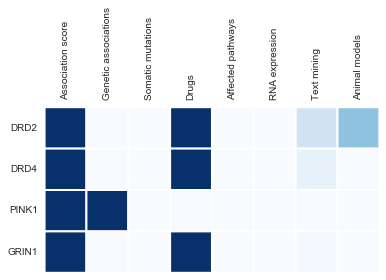

In [121]:
# Draw the heatmap
%matplotlib inline
data = np.array(associations)
fig, ax = plt.subplots()
heatmap = ax.pcolor(associations, cmap=plt.cm.Blues, edgecolor='white', linewidth=2)

#
# Formatting:
#

# Put some space at the top for the labels
fig.subplots_adjust(top=0.7)
ax.set_frame_on(False)

# column labels
datatypes = ['Association score', 'Genetic associations', 'Somatic mutations', 'Drugs', 'Affected pathways', 'RNA expression', 'Text mining', 'Animal models']

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(len(datatypes))+0.5, minor=False)
ax.set_yticks(np.arange(len(symbols))+0.5, minor=False)

# want a more natural, table-like display
ax.invert_yaxis()
ax.xaxis.tick_top()

ax.set_xticklabels(datatypes, minor=False, rotation='vertical')
ax.set_yticklabels(symbols, minor=False)

# remove the tick marks
for t in ax.xaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False
for t in ax.yaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False
    
#
# Show the heatmap
#
plt.show()



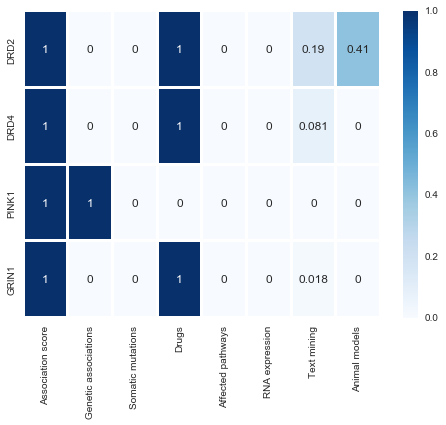

In [122]:
%matplotlib inline
import seaborn as sns; sns.set()
ax = sns.heatmap(mydata, cmap=plt.cm.Blues, annot=True, linewidths=2)
sns.plt.show()